<a href="https://colab.research.google.com/github/saniyanafees6/Profitable-App-Profiles-for-the-App-Store-and-Google-Play-Markets/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Apple App Store and Google Play Store to Determine Profitable Apps

In this project, I will be analyzing the data from the Apple App Store and Google Play Store to determine which type of Apps are more likely to be profitable. One plausible use for this analysis could be to determine which types of apps to build, and hopefully be the most profitable. 


## Uploading Our Data

We're using the following sample dataset from [Kaggle](https://www.kaggle.com) for our analysis

- [Apple Data Set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) 
- [Google Data Set](https://www.kaggle.com/lava18/google-play-store-apps/home)

I start off by downloading the datasets from kaggle and uploading them to a [repo](https://github.com/saniyanafees6/Profitable-App-Profiles-for-the-App-Store-and-Google-Play-Markets) on [Github](https://github.com/). And view the first couple of lines of each dataset to get some idea of values we have and can potentially manipulate.

In [128]:
import pandas as pd



apple_url='https://raw.githubusercontent.com/saniyanafees6/Profitable-App-Profiles-for-the-App-Store-and-Google-Play-Markets/master/data/AppleStore.csv'
google_url='https://raw.githubusercontent.com/saniyanafees6/Profitable-App-Profiles-for-the-App-Store-and-Google-Play-Markets/master/data/googleplaystore.csv'

apple_data=pd.read_csv(apple_url).set_index('Unnamed: 0')
apple_data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,,,,,,,,,,,,,,,,
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [129]:
google_data=pd.read_csv(google_url)
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Analyzing the Headers for both Datasets

For each dataset the following columns seem interesting: 

### Apple
- `'track_name'`
- `'currency'`
- `'price'`
- `'rating_count_tot'`
- `'rating_count_ver'`
- `'prime_genre'`

### Google
- `'App'`
- `'Category'`
- `'Reviews'`
- `'Installs'`
- `'Type'`
- `'Price'`
- `'Genres'`


## Cleaning Our Data

Now that we've successfully loaded our data we'll begin by cleaning our Datasets. Up reading the [discussion forum](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) we discover that the data at index 10472 is missing a value. we'll print it out to confirm that 


In [130]:
google_data.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

**This is indeed true, and we must remove this line**

In [0]:
google_data = google_data.drop([10472])


In [132]:
google_data.iloc[10472,:]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                 4.1M
Installs                      10,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                              Tools
Last Updated               August 7, 2018
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 10473, dtype: object

**Now that we've successfully deleted the row with missing values we'll be further cleaning data by removing:**
- Paid Apps
- Non-English Apps
- Repeated Apps

In [133]:
for index,row in google_data.iterrows():
  if google_data['App'][index] == 'Instagram':
    print(google_data.iloc[index,:])
    print('\n\n\n')

App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577313
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2545, dtype: object




App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577446
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 26

**Running this little test we can see that our dataset contains duplicate values. So we'll be writing a function that we can run on both data sets that will remove repeated rows**

In [134]:
new_android = google_data.sort_values(['App','Reviews'],ascending=[True,False])
new_android = new_android.reset_index()

for index,row in new_android.iterrows():
  if new_android['App'][index] == 'Instagram':
    print(new_android.iloc[index,:])
    print('\n\n\n')

index                           2604
App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577446
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 5958, dtype: object




index                           2545
App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577313
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current 

In [135]:
newer_android =  new_android.drop_duplicates(subset='App', keep='first')
newer_android

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5,5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
6,10252,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
7,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
9,8483,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
10,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8M,100+,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up


In [136]:
newer_android = newer_android.reset_index()
for index,row in newer_android.iterrows():
  if newer_android['App'][index] == 'Instagram':
    print(newer_android.iloc[index,:])
    print('\n\n\n')

level_0                         5958
index                           2604
App                        Instagram
Category                      SOCIAL
Rating                           4.5
Reviews                     66577446
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           July 31, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 5399, dtype: object






In [137]:
len(newer_android)

9659

**Now that we've successfully removed  our data**

In [0]:
# for index,row in newer_android.iterrows():
#   if(is_english(newer_android['App'][index]) == False):
#     newer_android = newer_android.drop([index])
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True
 



In [0]:
for index,row in newer_android.iterrows():
  if(is_english(newer_android['App'][index]) == False):
    newer_android = newer_android.drop([index])

In [140]:
newer_android

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,1,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,2,324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,3,4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,4,4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5,5,5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
6,6,10252,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
7,7,1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8,9,8483,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
9,10,7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8M,100+,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up


In [0]:
newer_android = newer_android.drop(['level_0', 'index'], axis=1)

In [0]:
newer_android = newer_android.reset_index()

In [0]:
newer_android = newer_android.drop(['index'], axis=1)

In [144]:
newer_android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
6,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
7,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
9,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8M,100+,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up


**Creating a function to check if all the Apps in the datasets are free or not**

In [0]:
newer_android = newer_android.drop(newer_android[newer_android['Price'] != '0'].index)

In [146]:
newer_android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
6,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
7,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
11,100 Doors of Revenge,FAMILY,4.1,105766,48M,"10,000,000+",Free,0,Teen,Puzzle,"May 24, 2018",2.2.2,4.4 and up


In [147]:
newer_android = newer_android.reset_index()
newer_android = newer_android.drop(['index'], axis=1)
newer_android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
6,1. FC Köln App,SPORTS,4.6,2019,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
7,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
9,100 Doors of Revenge,FAMILY,4.1,105766,48M,"10,000,000+",Free,0,Teen,Puzzle,"May 24, 2018",2.2.2,4.4 and up


**Now that we've successfully cleaned the dataset for the android apps, we'll move on to cleaning the iOS dataset**

In [0]:
for index,row in apple_data.iterrows():
  if(is_english(apple_data['track_name'][index]) == False):
    apple_data = apple_data.drop([index])

In [149]:
apple_data

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,,,,,,,,,,,,,,,,
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1


In [150]:
new_ios = apple_data.reset_index()
new_ios = new_ios.drop(['Unnamed: 0'], axis=1)

new_ios

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [0]:
new_ios = new_ios.drop(new_ios[new_ios['price'] != 0.00].index)

In [152]:
new_ios

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.0,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,283646709,PayPal - Send and request money safely,227795968,USD,0.0,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
12,284815942,Google – Search made just for mobile,179979264,USD,0.0,479440,203,3.5,4.0,27.0,17+,Utilities,37,4,33,1
13,284847138,Bank of America - Mobile Banking,160925696,USD,0.0,119773,2336,3.5,4.5,7.3.8,4+,Finance,37,0,2,1
15,284876795,TripAdvisor Hotels Flights Restaurants,207907840,USD,0.0,56194,87,4.0,3.5,21.1,4+,Travel,37,1,26,1
16,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1


In [153]:
print(len(newer_android))
print(len(new_ios))

8862
3222


**After cleaning the data, we're left with 8862 Android Apps and 3222 iOS Apps**

In [160]:
newer_android['Installs'] = newer_android['Installs'].str.replace(',','')
newer_android['Installs'] = newer_android['Installs'].str.replace('+','')
newer_android['Installs'] = pd.to_numeric(newer_android['Installs'])
newer_android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
6,1. FC Köln App,SPORTS,4.6,2019,41M,100000,Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
7,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,100000,Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
9,100 Doors of Revenge,FAMILY,4.1,105766,48M,10000000,Free,0,Teen,Puzzle,"May 24, 2018",2.2.2,4.4 and up


In [179]:
android_freq_dict = dict()

for index,row in newer_android.iterrows():
  if (newer_android['Category'][index] in android_freq_dict):
    android_freq_dict[newer_android['Category'][index]] = int(android_freq_dict[newer_android['Category'][index]]) + int(newer_android['Installs'][index])
  else:
    android_freq_dict[newer_android['Category'][index]] = int(newer_android['Installs'][index])
#   if newer_android['Category'][index] in android_freq_dict:
#     android_freq_dict[newer_android['Category'][index]] = android_freq_dict[newer_android['Category'][index]].value() + android_freq_dict[newer_android['Installs'][index]]
#   else:
#     android_freq_dict[newer_android['Category'][index]] = android_freq_dict[newer_android['Installs'][index]]

print(android_freq_dict)

{'SPORTS': 1095230683, 'SOCIAL': 5487861902, 'COMICS': 44971150, 'TOOLS': 8001043474, 'COMMUNICATION': 11036906201, 'NEWS_AND_MAGAZINES': 2368196260, 'HEALTH_AND_FITNESS': 1143548402, 'FAMILY': 6198995690, 'LIFESTYLE': 497484429, 'BUSINESS': 696902090, 'SHOPPING': 1400338585, 'MEDICAL': 37632344, 'GAME': 13366869450, 'FINANCE': 455163132, 'PERSONALIZATION': 1529235888, 'PHOTOGRAPHY': 4647268815, 'TRAVEL_AND_LOCAL': 2894704086, 'DATING': 140914757, 'PRODUCTIVITY': 5791629314, 'ART_AND_DESIGN': 113221100, 'FOOD_AND_DRINK': 211738751, 'VIDEO_PLAYERS': 3931731720, 'BOOKS_AND_REFERENCE': 1665884260, 'HOUSE_AND_HOME': 97202461, 'MAPS_AND_NAVIGATION': 503060780, 'EVENTS': 15973160, 'EDUCATION': 189350000, 'AUTO_AND_VEHICLES': 53080061, 'WEATHER': 360288520, 'BEAUTY': 27197050, 'ENTERTAINMENT': 989460000, 'LIBRARIES_AND_DEMO': 52995810, 'PARENTING': 31471010}


<BarContainer object of 33 artists>

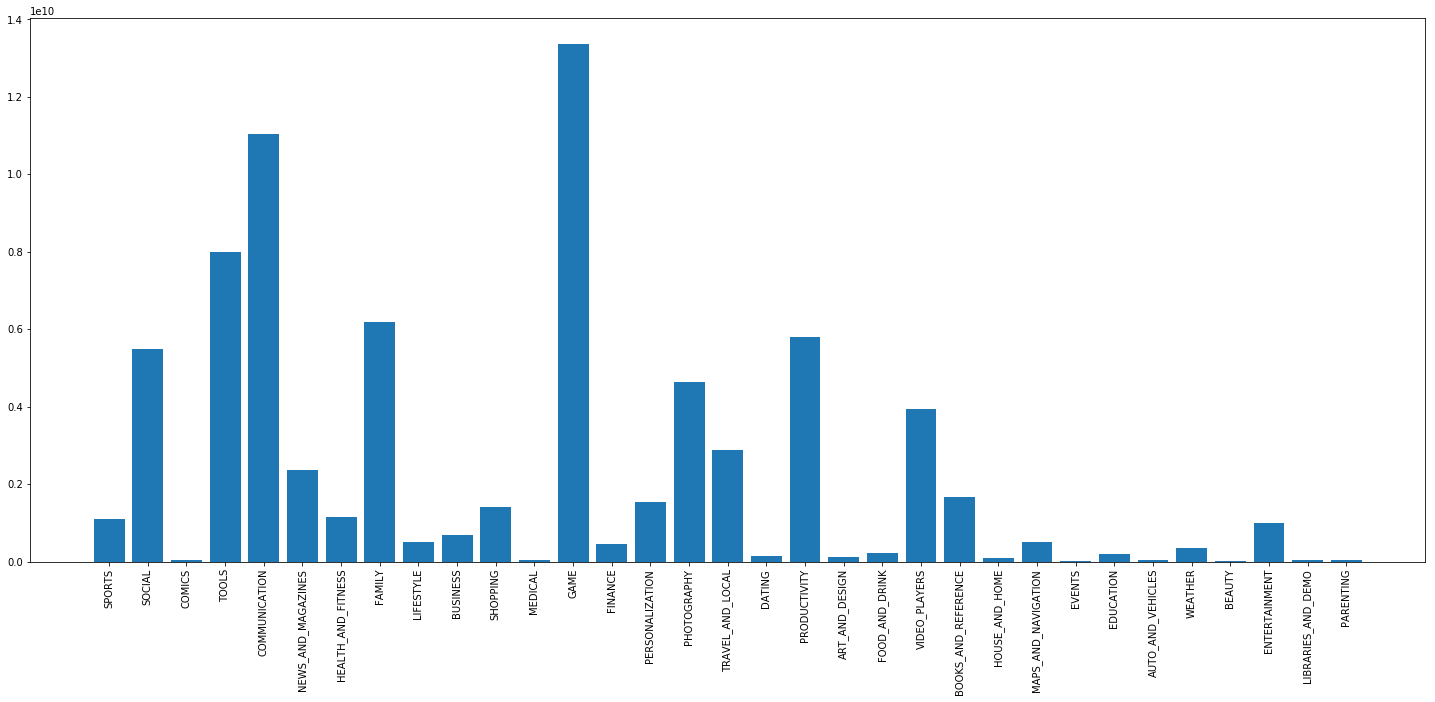

In [188]:
import matplotlib.pyplot as plt

names = list(android_freq_dict.keys())
values = list(android_freq_dict.values())
%matplotlib inline

plt.figure(figsize=(25,10))
# plt.bar(range(len(android_freq_dict)), list(android_freq_dict.values()), align='center')
plt.xticks(rotation='vertical')
plt.bar(range(len(android_freq_dict)),values,tick_label=names)

In [190]:
ios_freq_dict = dict()
for index,row in new_ios.iterrows():
  if (new_ios['prime_genre'][index] in ios_freq_dict):
    ios_freq_dict[new_ios['prime_genre'][index]] = int(ios_freq_dict[new_ios['prime_genre'][index]]) + int(new_ios['rating_count_tot'][index])
  else:
    ios_freq_dict[new_ios['prime_genre'][index]] = int(new_ios['rating_count_tot'][index])
    
print(ios_freq_dict)


{'Productivity': 1177591, 'Weather': 1463837, 'Shopping': 2261254, 'Reference': 1348958, 'Finance': 1132846, 'Music': 3783551, 'Utilities': 1513441, 'Travel': 1129752, 'Social Networking': 7584125, 'Sports': 1587614, 'Health & Fitness': 1514371, 'Games': 42705967, 'Food & Drink': 866682, 'News': 913665, 'Book': 556619, 'Photo & Video': 4550647, 'Entertainment': 3563577, 'Business': 127349, 'Lifestyle': 840774, 'Education': 826470, 'Navigation': 516542, 'Medical': 3672, 'Catalogs': 16016}


<BarContainer object of 23 artists>

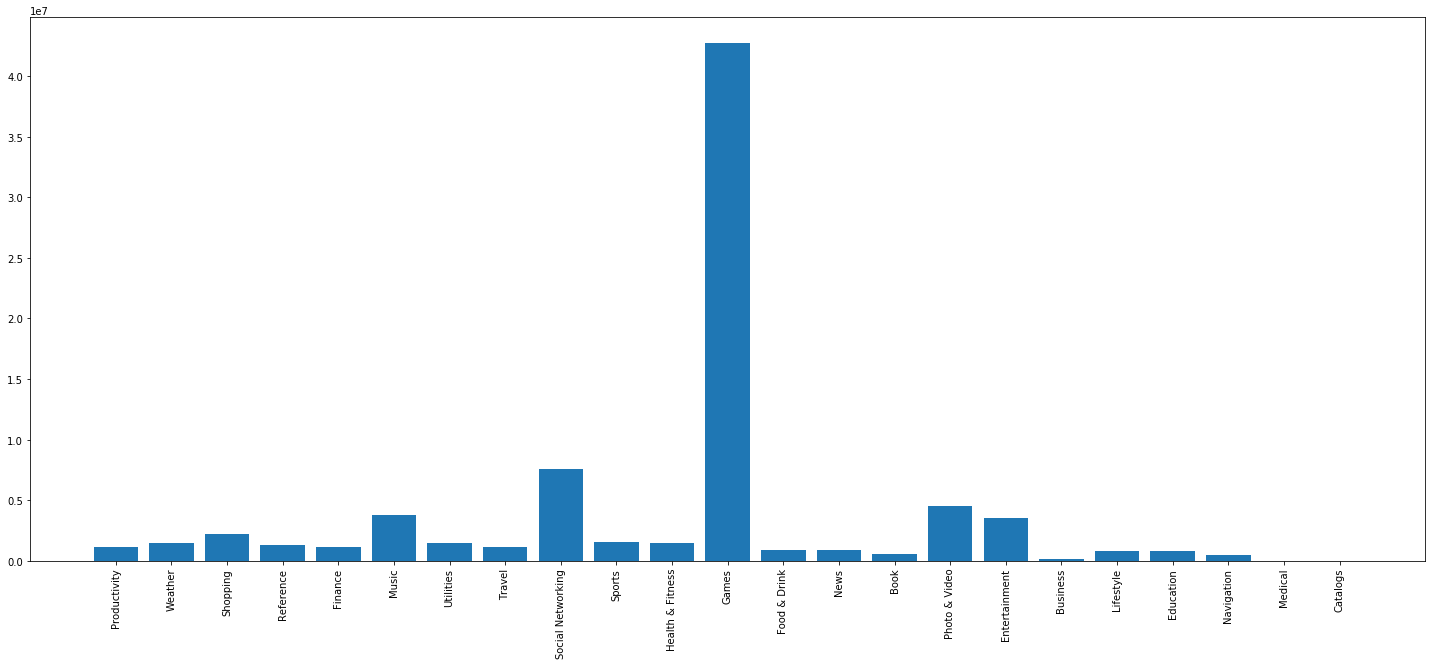

In [192]:
inames = list(ios_freq_dict.keys())
ivalues = list(ios_freq_dict.values())


plt.figure(figsize=(25,10))
# pl2t.bar(range(len(android_freq_dict)), list(android_freq_dict.values()), align='center')
plt.xticks(rotation='vertical')
plt.bar(range(len(ios_freq_dict)),ivalues,tick_label=inames)

## Conclusions

Looking at the graphs for the iOS and Android datasets, we can conclude that the "Games" genre seems to attract the most amount of installs, therefore, choosing to build a Games for both platforms would be a wise choice.